# TASK 1

# Prediction Using Supervised   Machine Learning

# By Zehra Salmani

In [1]:
#importing  the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the dataset

data = pd.read_csv('http://bit.ly/w-data')

In [3]:
#printing first 10 values of dataset

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking the no.of rows and columns of our dataset 

data.shape

(25, 2)

In [5]:
#describe function calculates some statistical details 

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#here we check that whether our data contains null values

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#dtypes tells us datatype of columns 

data.dtypes

Hours     float64
Scores      int64
dtype: object

# Plotting Distribution of data

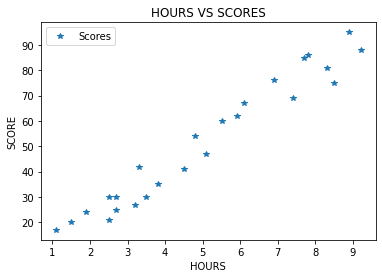

In [8]:
data.plot(x='Hours', y='Scores', style='*')
plt.title("HOURS VS SCORES")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.show()

We can see that scores and hours have positive relation.

# Model Building

In [9]:
#Divided the data as input(hours)

x= data.iloc[:, :-1].values

In [10]:
#Divided the data as output(scores)
y= data.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,  ytest = train_test_split(x, y,test_size=0.2,random_state=0)

In [12]:
#training model

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression()

In [13]:
#plotting the regression line

regline = linreg.coef_*x+linreg.intercept_

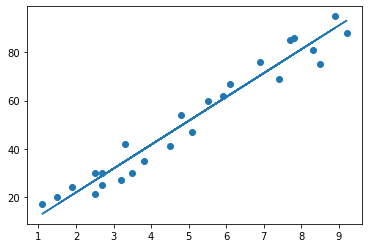

In [14]:
#plotting for test data

plt.scatter(x,y)
plt.plot(x,regline)
plt.show()

# Making predictions

In [15]:
#predicting the output(scores)
pred= linreg.predict(xtest)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
#comparing the actual data and the predicted data

df = pd.DataFrame({'Actual': ytest, 'Predicted': pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#testing your data

user=float(input("No.of hours: "))
print("predicted score={}".format(linreg.predict([[user]])))

No.of hours: 9.25
predicted score=[93.69173249]


# Evaluating the model

In [20]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error:  4.183859899002982


mean absolute error is basically the sum of differnces between target and predicted values

In [23]:
#calculating mean squared and root mean squared error

from sklearn.metrics import mean_squared_error
msqerr= mean_squared_error(ytest,pred)      #used to check how close predicted values are to actual values
msqerr

21.598769307217456

In [26]:
rmsqerr= np.sqrt(msqerr)
rmsqerr                                 #low rmsqerr indicate better fit of model to data

4.647447612100373